<a href="https://colab.research.google.com/github/Dadoyen2/Artificial-Neural-network-for-the-Analysis-of-Portuguese-wines-Project/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# insert your code here
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os,sys
from IPython.display import display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
import shap

fatal: destination path 'pyPhysChem' already exists and is not an empty directory.



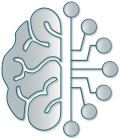

**Start at:** Monday 09 December 2024, 23:40:05  
**Hostname:** 3ae37ed88fba (Linux)

<p style="text-align: center"><img width="800px" src="/content/pyPhysChem/configsvg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

Modules imported and initialized successfully!


In [100]:
!git clone https://github.com/rpoteau/pyPhysChem.git
import sys
sys.path.append('/content/pyPhysChem/config')
# Import the required modules
import visualID_Eng as vID
from visualID_Eng import color, fg, hl, bg
import tools4pyPhysChem as t4pPC

# Initialize visualID_Eng
vID.init('/content/pyPhysChem/config')

print("Modules imported and initialized successfully!")

In [101]:


# Paths to the files
file_path_red = '/content/winequality-red.csv'
file_path_white = '/content/winequality-white.csv'

# Load the data using pandas
data_red = pd.read_csv(file_path_red, sep=";", header=0)
data_white = pd.read_csv(file_path_white, sep=";", header=0)

# Change the last column of white wine data to 1
data_white.iloc[:, -1] = 1  # Update the last column (for white wine)

# Change the last column of red wine data to 0
data_red.iloc[:, -1] = 0  # Update the last column (for red wine)

# Add a column to indicate wine type (1 for white, 0 for red)
data_red['wine_type'] = 0  # Red wine type is 0
data_white['wine_type'] = 1  # White wine type is 1

# Combine the two DataFrames (concatenate them)
data_combined = pd.concat([data_red, data_white], ignore_index=True)

# Shuffle the combined DataFrame to mix red and white wines randomly
data_combined = data_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Print column names before removing 'quality' to check for any issues
#print("Column names before removing 'quality':", data_combined.columns)

# Remove the 'quality' column
data_combined.drop(columns=['quality'], inplace=True)


# Change the last column name to 'red_wine'
#data_combined.rename(columns={data_combined.columns[-1]: 'red_wine'}, inplace=True)

# Display the first 100 rows
display(data_combined)

# Display descriptive statistics with 2 decimal places
display(data_combined.describe().style.format("{0:.2f}"))

features = data_combined.columns[:-1]
Target=    data_combined.columns[-1]

#from google.colab import files

# Save the DataFrame as a CSV file in the Colab environment
#output_file = '/content/data_combined.csv'
#data_combined.to_csv(output_file, index=False)
# Download the CSV file to your local machine
#files.download(output_file)





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,1
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,1
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,1
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,1
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,1
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,1
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,0.75
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,1.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,1.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,1.00


In [102]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import files

# Extract feature values
x = data_combined.loc[:, features].values
y = data_combined['wine_type'].values  # Extract the target variable (or correct column)

# Display original feature values (first 5 rows)
print("Original Feature Values (First 5 Rows):")
display(pd.DataFrame(x, columns=features).head())

# Standardize the feature values
x = StandardScaler().fit_transform(x)

# Convert standardized values to a DataFrame
standardized_features = pd.DataFrame(x, columns=features)

# Add the target column to the standardized data
standardized_features['wine_type'] = y

# Display standardized features with target column (first 5 rows)
print("Standardized Features with Target (First 5 Rows):")
display(standardized_features.head())

# Save the standardized features and target to a CSV file
output_file = '/content/standardized_data.csv'
standardized_features.to_csv(output_file, index=False)

# Download the file to your local machine
files.download(output_file)



Original Feature Values (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9


Standardized Features with Target (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308,1
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219,0
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610,1
3,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615,1
4,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

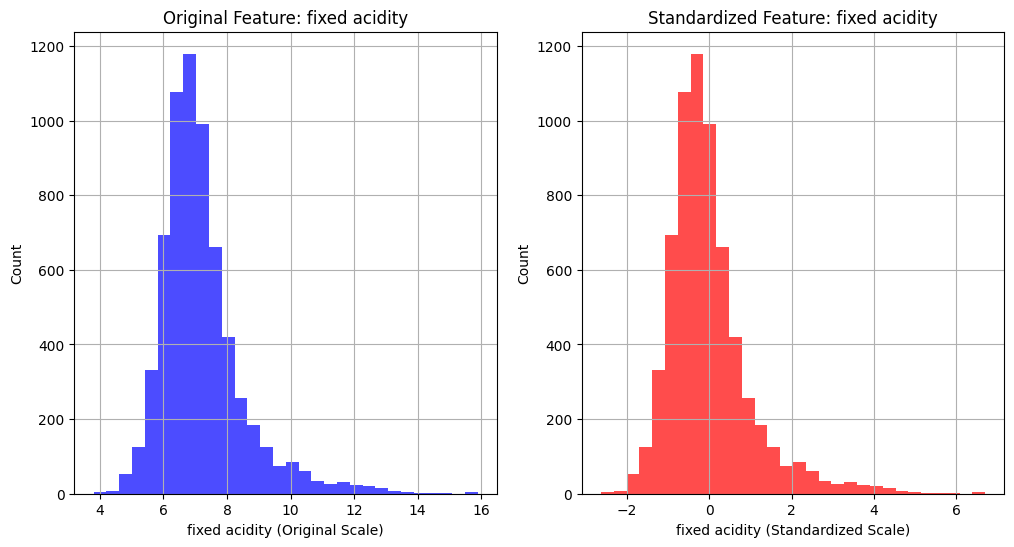

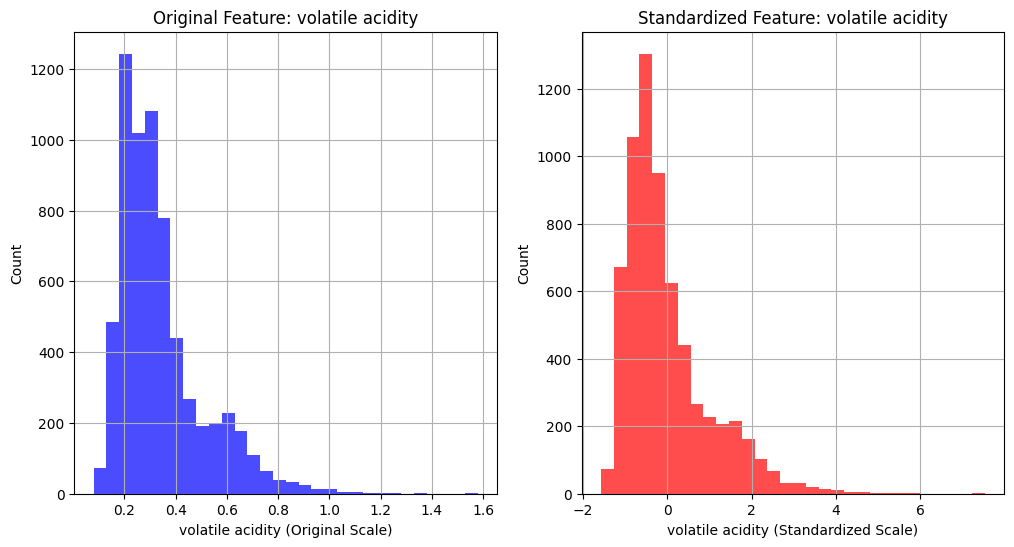

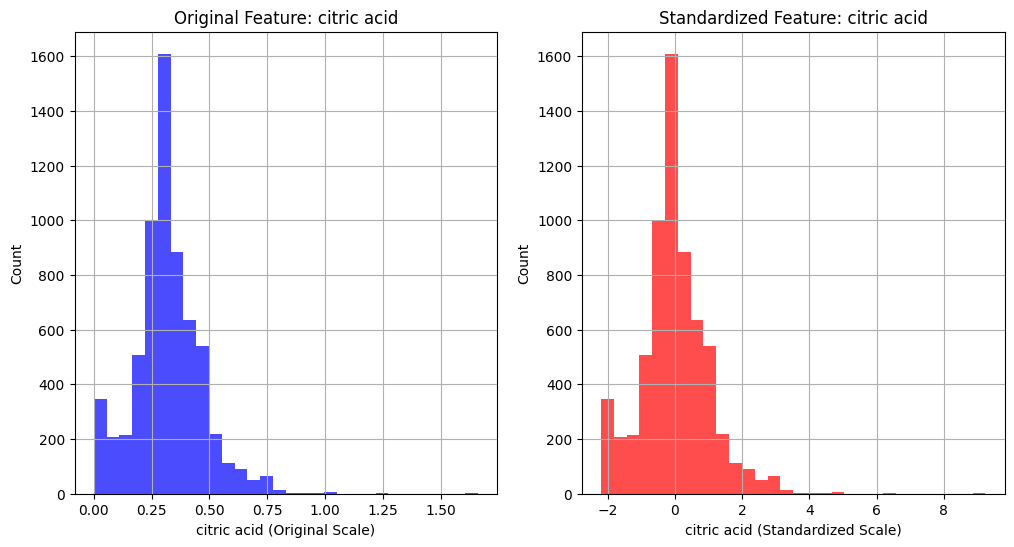

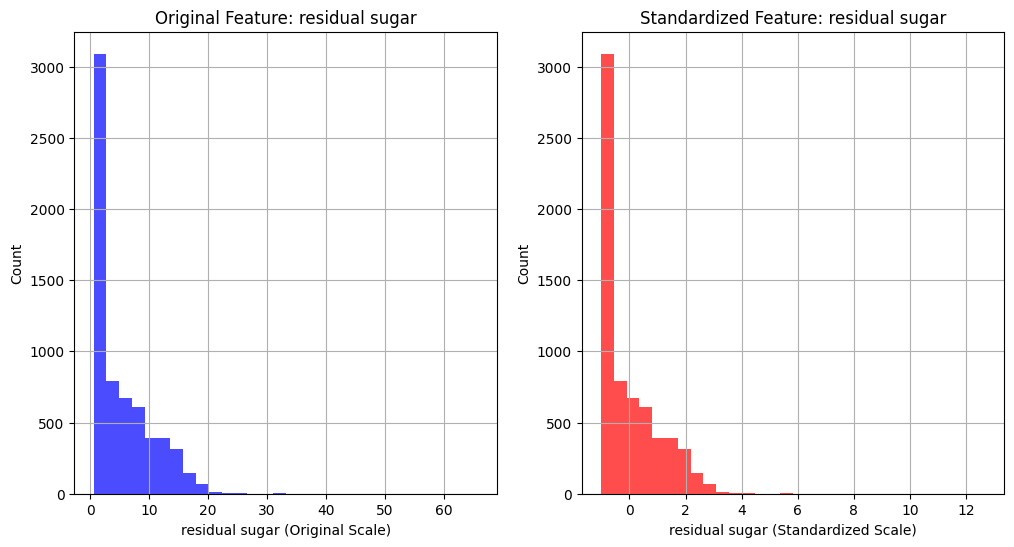

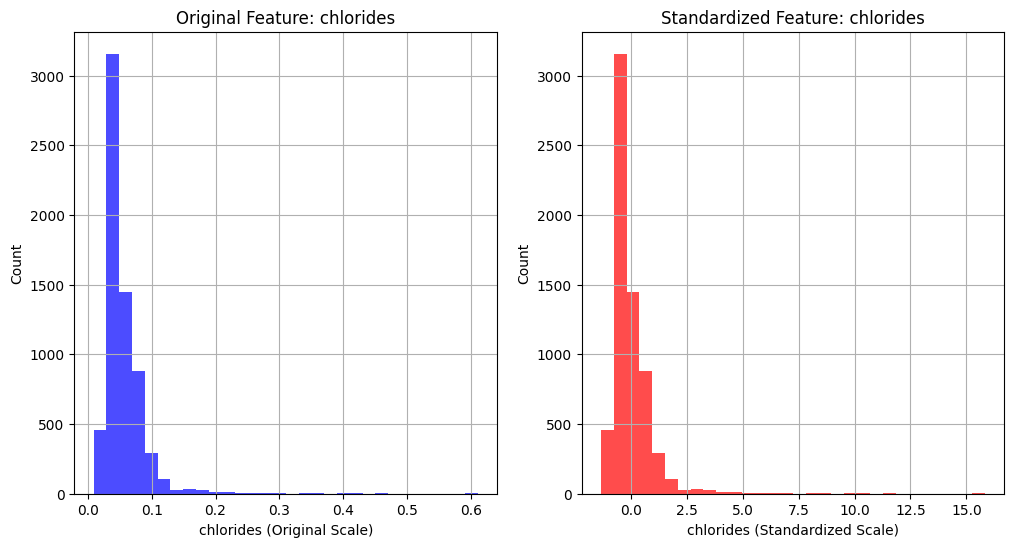

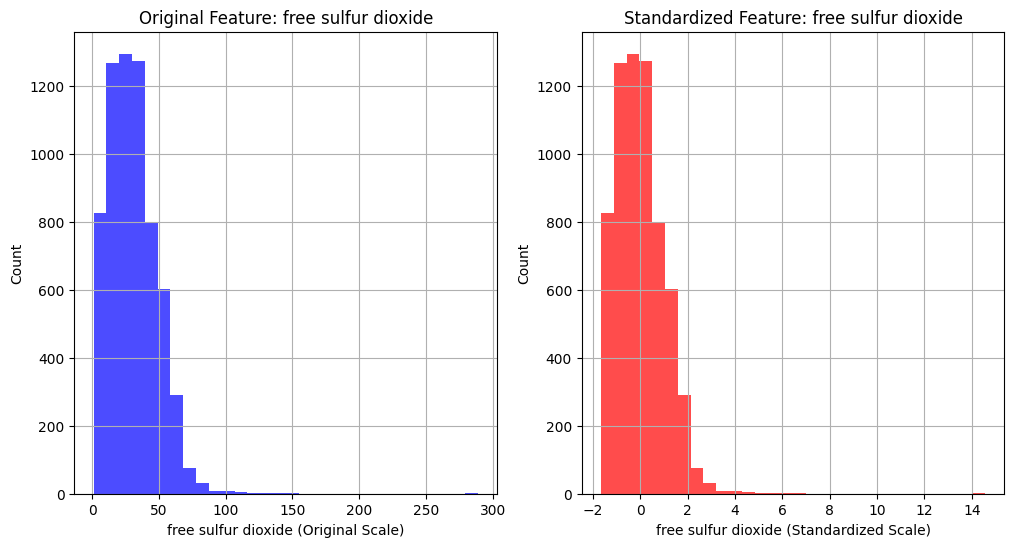

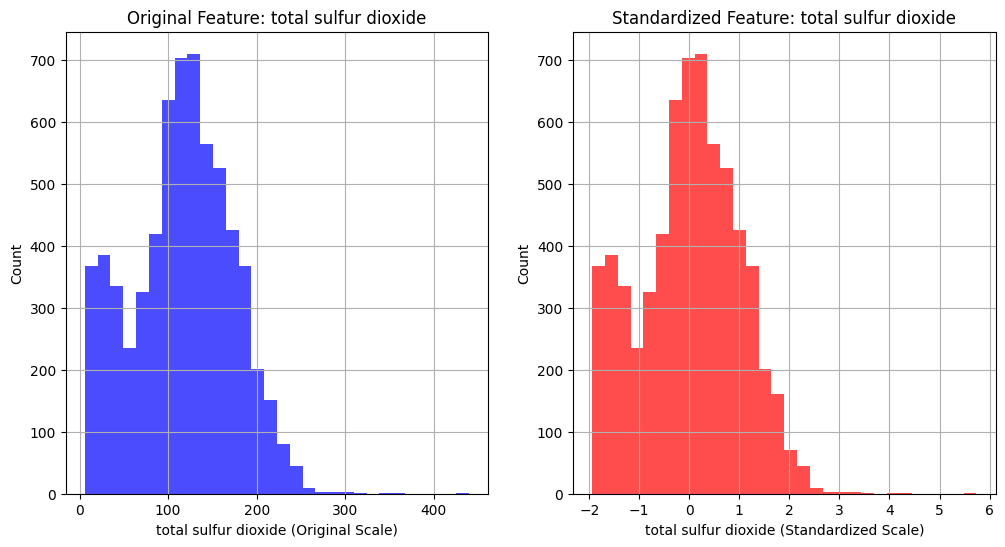

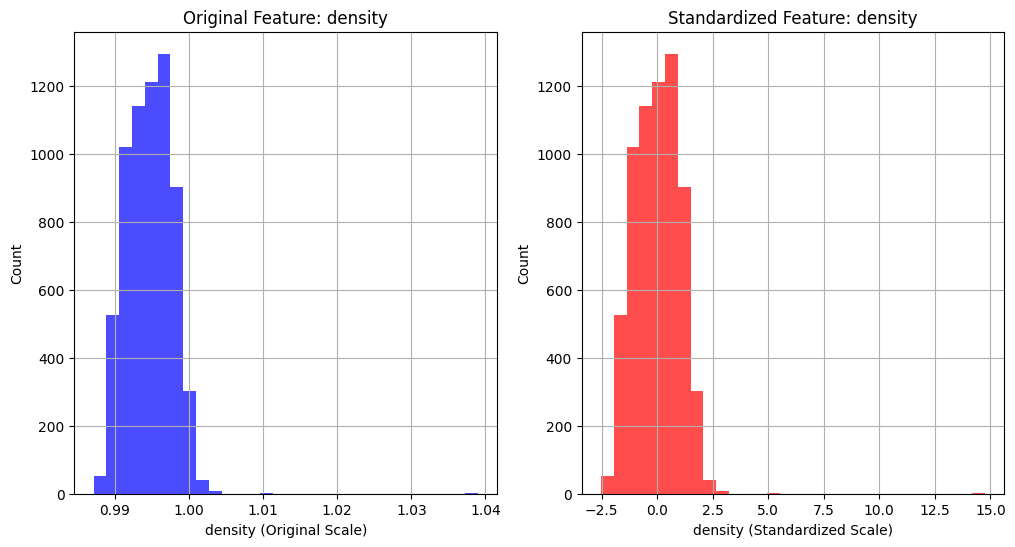

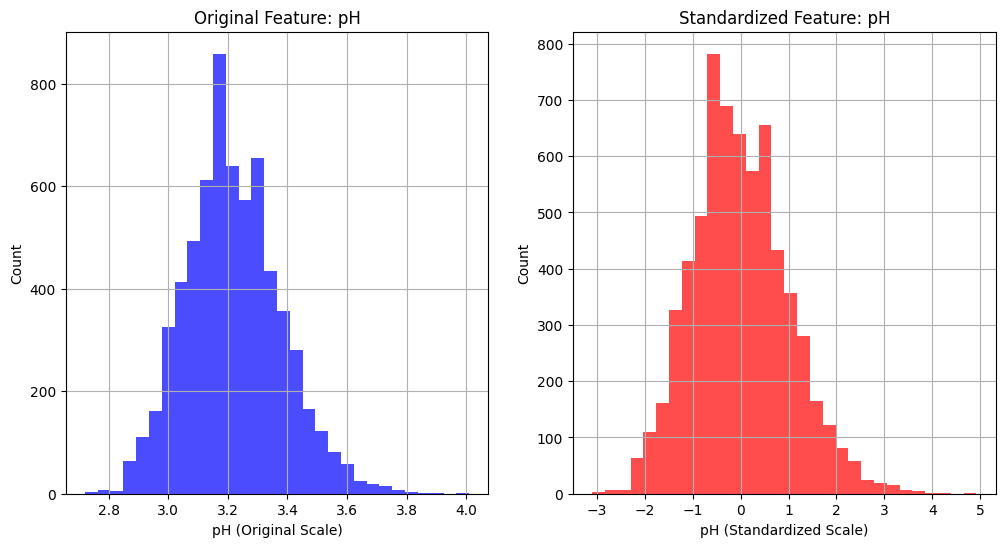

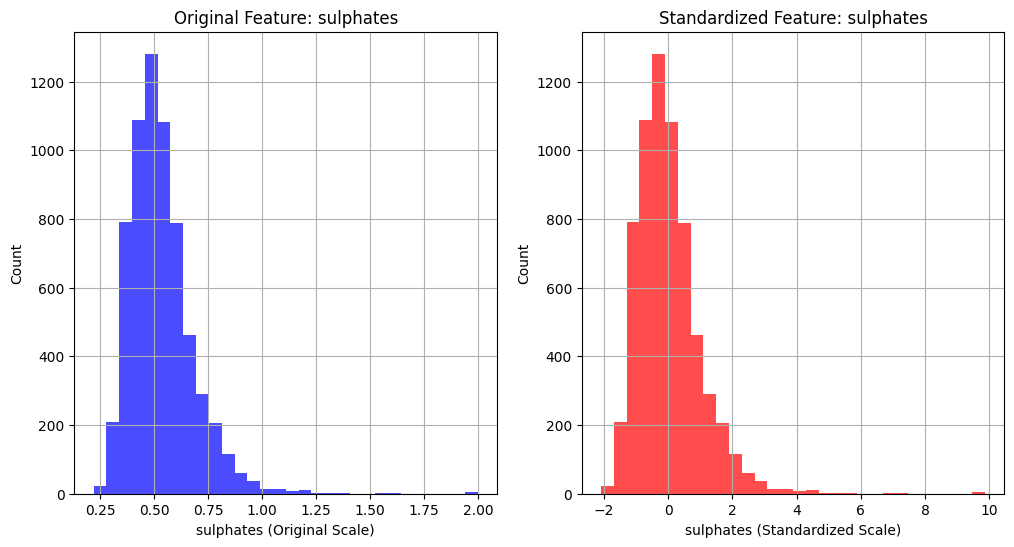

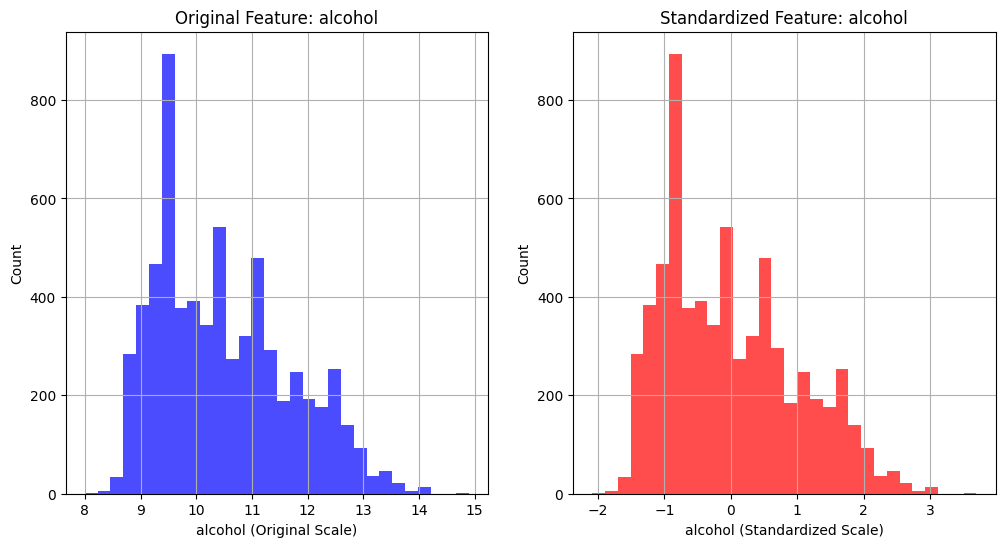

In [103]:


# Create a DataFrame for original features
original_features_df = pd.DataFrame(data=data_combined.loc[:, features].values, columns=features)

# Loop through each feature to plot histograms
for feature in features:
    plt.figure(figsize=(12, 6))

    # Plot histogram for original feature values
    plt.subplot(1, 2, 1)
    plt.hist(original_features_df[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f"Original Feature: {feature}")
    plt.xlabel(f"{feature} (Original Scale)")
    plt.ylabel("Count")
    plt.grid(True)

    # Plot histogram for standardized feature values
    plt.subplot(1, 2, 2)
    plt.hist(standardized_features[feature], bins=30, color='red', alpha=0.7)
    plt.title(f"Standardized Feature: {feature}")
    plt.xlabel(f"{feature} (Standardized Scale)")
    plt.ylabel("Count")
    plt.grid(True)

    #plt.tight_layout()
    #plt.show()


PCA Results (First 5 Rows):


,Principal Component 1,Principal Component 2,wine_type
0,1.527867,-0.243192,1
1,-0.992811,0.451662,0
2,0.890290,-1.346777,1
3,2.582863,1.086256,1
4,2.503377,2.280745,1



Explained Variance Ratio:
[0.2754426  0.22671146]


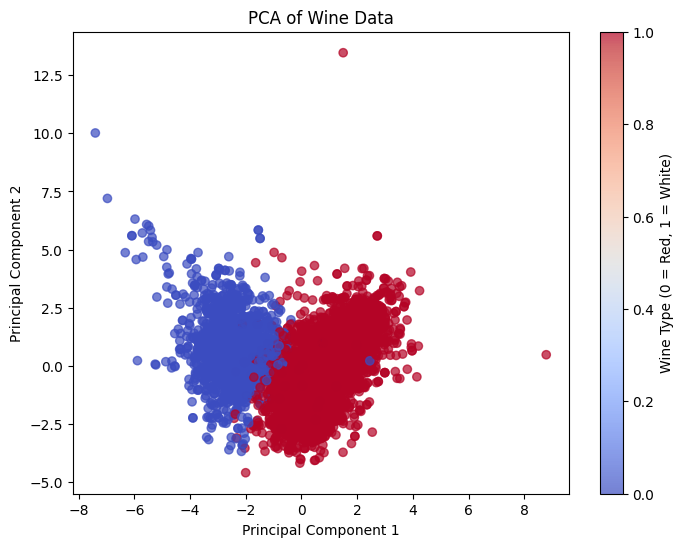

PCA Coefficients (Loadings):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,-0.238799,-0.380757,0.152388,0.345920,-0.290113,0.430914,0.487418,-0.044937,-0.218686,-0.294135,-0.106437
PC2,0.336355,0.117550,0.183299,0.329914,0.315258,0.071933,0.087266,0.584037,-0.155869,0.191716,-0.465058


In [104]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(x)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with the target variable
final_df = pd.concat([principal_df, data_combined[['wine_type']].reset_index(drop=True)], axis=1)

# Display the first few rows of the PCA result
print("PCA Results (First 5 Rows):")
display(final_df.head())

# Explained variance
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plotting the PCA
plt.figure(figsize=(8, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'],
            c=final_df['wine_type'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Wine Type (0 = Red, 1 = White)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Data')
plt.show()

print("PCA Coefficients (Loadings):")
coefficients_df = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
display(coefficients_df)


In [105]:
"""
# Define acceptable ranges for the principal components
pc1_min, pc1_max = -7.5, 7.5  # Example range for Principal Component 1
pc2_min, pc2_max = -7.5, 7.5  # Example range for Principal Component 2

# Filter the DataFrame to retain only rows within the range
filtered_df = final_df[
    (final_df['Principal Component 1'] >= pc1_min) &
    (final_df['Principal Component 1'] <= pc1_max) &
    (final_df['Principal Component 2'] >= pc2_min) &
    (final_df['Principal Component 2'] <= pc2_max)
]

# Display the first few rows of the filtered data
print("Filtered PCA Data (First 5 Rows):")
display(filtered_df.head())

# Plotting the filtered PCA data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Principal Component 1'], filtered_df['Principal Component 2'],
            c=filtered_df['wine_type'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Wine Type (0 = Red, 1 = White)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Filtered PCA of Wine Data')
plt.grid(True)
plt.show()
"""

'\n# Define acceptable ranges for the principal components\npc1_min, pc1_max = -7.5, 7.5  # Example range for Principal Component 1\npc2_min, pc2_max = -7.5, 7.5  # Example range for Principal Component 2\n\n# Filter the DataFrame to retain only rows within the range\nfiltered_df = final_df[\n    (final_df[\'Principal Component 1\'] >= pc1_min) & \n    (final_df[\'Principal Component 1\'] <= pc1_max) & \n    (final_df[\'Principal Component 2\'] >= pc2_min) & \n    (final_df[\'Principal Component 2\'] <= pc2_max)\n]\n\n# Display the first few rows of the filtered data\nprint("Filtered PCA Data (First 5 Rows):")\ndisplay(filtered_df.head())\n\n# Plotting the filtered PCA data\nplt.figure(figsize=(8, 6))\nplt.scatter(filtered_df[\'Principal Component 1\'], filtered_df[\'Principal Component 2\'], \n            c=filtered_df[\'wine_type\'], cmap=\'coolwarm\', alpha=0.7)\nplt.colorbar(label=\'Wine Type (0 = Red, 1 = White)\')\nplt.xlabel(\'Principal Component 1\')\nplt.ylabel(\'Principal Com

In [109]:

# Split the standardized data into training (80%) and test (20%) sets
train_data, test_data = train_test_split(standardized_features, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

# Display the first few rows of each set
print("\nTraining Data (First 5 Rows):")
display(train_data.head())

print("\nTest Data (First 5 Rows):")
display(test_data.head())


Training Data Shape: (5197, 12)
Test Data Shape: (1300, 12)

Training Data (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
1916,-0.011808,-1.030629,0.147046,0.201109,-0.400614,-0.818419,-0.083949,-0.639210,-1.421248,-0.882212,0.258422,1
947,-0.397511,-0.666161,-1.022893,-0.870896,0.141764,-0.931107,-0.278579,-0.732592,-0.923657,0.125890,-0.831615,1
877,0.528176,-1.091373,-0.128234,-0.135206,-0.543345,0.364811,0.977669,0.668136,1.564294,-0.613385,-1.250860,1
2927,0.142473,-0.787650,-0.334694,-0.891916,-0.429160,-0.198632,-0.296272,-0.665890,-0.177272,-1.352660,-0.580068,1
6063,2.070989,1.216920,-0.403514,-0.723758,1.569076,-1.325517,-0.986324,0.798203,-1.732242,3.015783,-0.244672,0



Test Data (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
3103,-0.937495,-0.362438,0.215866,-0.744778,-0.543345,-0.818419,0.075294,-0.465786,-0.363868,1.066785,0.090724,1
1419,-0.397511,-0.483928,1.179346,0.558444,-0.115152,0.984598,1.437704,0.294608,-0.177272,-0.344558,-0.831615,1
4761,-0.551792,-0.787650,0.353506,-0.618660,-0.229336,2.224172,0.393779,-0.999397,0.693511,1.470026,0.761516,1
4690,-0.628933,0.427241,-0.541153,1.798608,-0.229336,-0.367664,-0.048561,1.168395,1.377698,-0.008524,-0.580068,1
4032,-0.166089,0.487985,-0.885253,-0.660699,0.427227,-0.705730,-1.410971,0.021133,1.066704,0.193097,0.342271,0


In [112]:
from sklearn.model_selection import train_test_split

# Assuming `standardized_features` is your DataFrame with the last column as the target variable
# Split into features (X) and target (y)
X = standardized_features.iloc[:, :-1]  # All columns except the last (features)
y = standardized_features.iloc[:, -1]  # The last column (target variable)

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Optional: Display the first few rows of each dataset
print("\nX_train (First 5 Rows):")
display(X_train.head())

print("\nX_test (First 5 Rows):")
display(X_test.head())

print("\ny_train (First 5 Rows):")
display(y_train.head())

print("\ny_test (First 5 Rows):")
display(y_test.head())


X_train shape: (5197, 11)
X_test shape: (1300, 11)
y_train shape: (5197,)
y_test shape: (1300,)

X_train (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1916,-0.011808,-1.030629,0.147046,0.201109,-0.400614,-0.818419,-0.083949,-0.639210,-1.421248,-0.882212,0.258422
947,-0.397511,-0.666161,-1.022893,-0.870896,0.141764,-0.931107,-0.278579,-0.732592,-0.923657,0.125890,-0.831615
877,0.528176,-1.091373,-0.128234,-0.135206,-0.543345,0.364811,0.977669,0.668136,1.564294,-0.613385,-1.250860
2927,0.142473,-0.787650,-0.334694,-0.891916,-0.429160,-0.198632,-0.296272,-0.665890,-0.177272,-1.352660,-0.580068
6063,2.070989,1.216920,-0.403514,-0.723758,1.569076,-1.325517,-0.986324,0.798203,-1.732242,3.015783,-0.244672



X_test (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3103,-0.937495,-0.362438,0.215866,-0.744778,-0.543345,-0.818419,0.075294,-0.465786,-0.363868,1.066785,0.090724
1419,-0.397511,-0.483928,1.179346,0.558444,-0.115152,0.984598,1.437704,0.294608,-0.177272,-0.344558,-0.831615
4761,-0.551792,-0.787650,0.353506,-0.618660,-0.229336,2.224172,0.393779,-0.999397,0.693511,1.470026,0.761516
4690,-0.628933,0.427241,-0.541153,1.798608,-0.229336,-0.367664,-0.048561,1.168395,1.377698,-0.008524,-0.580068
4032,-0.166089,0.487985,-0.885253,-0.660699,0.427227,-0.705730,-1.410971,0.021133,1.066704,0.193097,0.342271



y_train (First 5 Rows):


,wine_type
1916,1
947,1
877,1
2927,1
6063,0



y_test (First 5 Rows):


,wine_type
3103,1
1419,1
4761,1
4690,1
4032,0


In [113]:
def define_model(NE): #NE = nombre de neurones d'entrée

    model = keras.models.Sequential()
    model.add(keras.layers.Input(NE, name='iLayer'))
    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))

    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9488 - loss: 0.1594 - val_accuracy: 0.9923 - val_loss: 0.0414
Epoch 2/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9947 - loss: 0.0221 - val_accuracy: 0.9954 - val_loss: 0.0337
Epoch 3/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9945 - loss: 0.0297 - val_accuracy: 0.9946 - val_loss: 0.0353
Epoch 4/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9981 - loss: 0.0104 - val_accuracy: 0.9946 - val_loss: 0.0327
Epoch 5/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9971 - loss: 0.0124 - val_accuracy: 0.9931 - val_loss: 0.0353
Epoch 6/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9968 - loss: 0.0129 - val_accuracy: 0.9938 - val_loss: 0.0384
Epoch 7/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9946 - val_loss: 0.0370
Epoch 8/700
1040/1040 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9983 - loss: 0

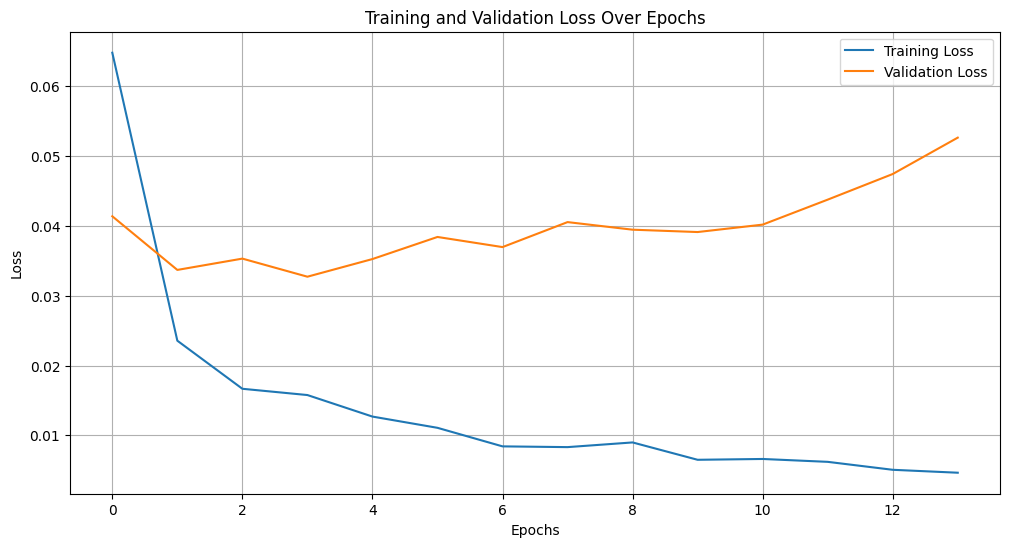

Model saved to /content/ANNmodel.h5
Training history saved to /content/ANNhistory.pkl


In [122]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import visualID_Eng as vID
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Start timing
vID.chrono_start()

# Define early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Define the model
def define_model(input_shape):
    model = Sequential([
        Dense(64, input_shape=input_shape, activation='relu', name='hLayer1'),  # Hidden layer 1
        Dense(32, activation='relu', name='hLayer2'),                          # Hidden layer 2
        Dense(1, activation='sigmoid', name='outputLayer')                     # Output layer (binary classification)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
ANNmodel = define_model((11,))  # Input shape is (11,) for 11 features
ANNmodel.summary()

# Start timing again
vID.chrono_start()

# Train the model
ANNhistory = ANNmodel.fit(
    X_train,
    y_train,
    epochs=700,
    batch_size=5,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[es]  # Apply early stopping
)

# Show elapsed time
vID.chrono_show()

# Evaluate the model on training and test data
train_eval = ANNmodel.evaluate(X_train, y_train, verbose=0)
test_eval = ANNmodel.evaluate(X_test, y_test, verbose=0)
print(f"\nTraining Evaluation: Loss = {train_eval[0]:.4f}, Accuracy = {train_eval[1]:.4f}")
print(f"Test Evaluation: Loss = {test_eval[0]:.4f}, Accuracy = {test_eval[1]:.4f}")

# Predictions for metrics calculation
ytrain_hat = ANNmodel.predict(X_train)
ytest_hat = ANNmodel.predict(X_test)

# Flatten predictions if needed
ytrain_hat = ytrain_hat.flatten()
ytest_hat = ytest_hat.flatten()

# Calculate residuals
diffyt = y_train - ytrain_hat
diffyp = y_test - ytest_hat

# Training metrics
train_mean = np.mean(diffyt)
train_std = np.std(diffyt)
train_mae = np.average(np.abs(diffyt))
train_r2 = np.corrcoef(y_train, ytrain_hat)[0, 1]

# Test metrics
test_mean = np.mean(diffyp)
test_std = np.std(diffyp)
test_mae = np.average(np.abs(diffyp))
test_r2 = np.corrcoef(y_test, ytest_hat)[0, 1]

# Display metrics
print("\nTraining Metrics:")
print(f"Mean: {train_mean:.4f}, SD: {train_std:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"Mean: {test_mean:.4f}, SD: {test_std:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(ANNhistory.history['loss'], label='Training Loss')
plt.plot(ANNhistory.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
model_path = '/content/ANNmodel.h5'
ANNmodel.save(model_path)
print(f"Model saved to {model_path}")

# Optionally save the history
history_path = '/content/ANNhistory.pkl'
joblib.dump(ANNhistory.history, history_path)
print(f"Training history saved to {history_path}")



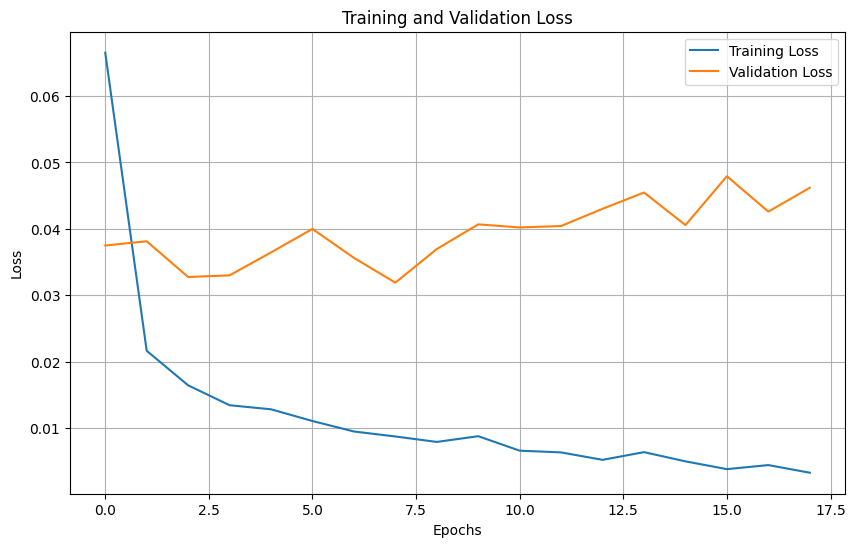

In [118]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(ANNhistory.history['loss'], label='Training Loss')
plt.plot(ANNhistory.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [120]:
# Compare metrics
print("\nTraining Metrics:")
print(f"Mean: {train_mean:.4f}, SD: {train_std:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"Mean: {test_mean:.4f}, SD: {test_std:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Check for overfitting
if train_r2 > 0.95 and (train_r2 - test_r2) > 0.1:
    print("\nPotential Overfitting Detected: Training R² is significantly higher than Test R².")
elif test_r2 > 0.95:
    print("\nGood Generalization: The model performs well on the test set.")
else:
    print("\nModel may underfit or not generalize well. Consider tuning.")



Training Metrics:
Mean: 0.0020, SD: 0.0313, MAE: 0.0033, R²: 0.9974

Test Metrics:
Mean: -0.0007, SD: 0.0717, MAE: 0.0077, R²: 0.9857

Good Generalization: The model performs well on the test set.


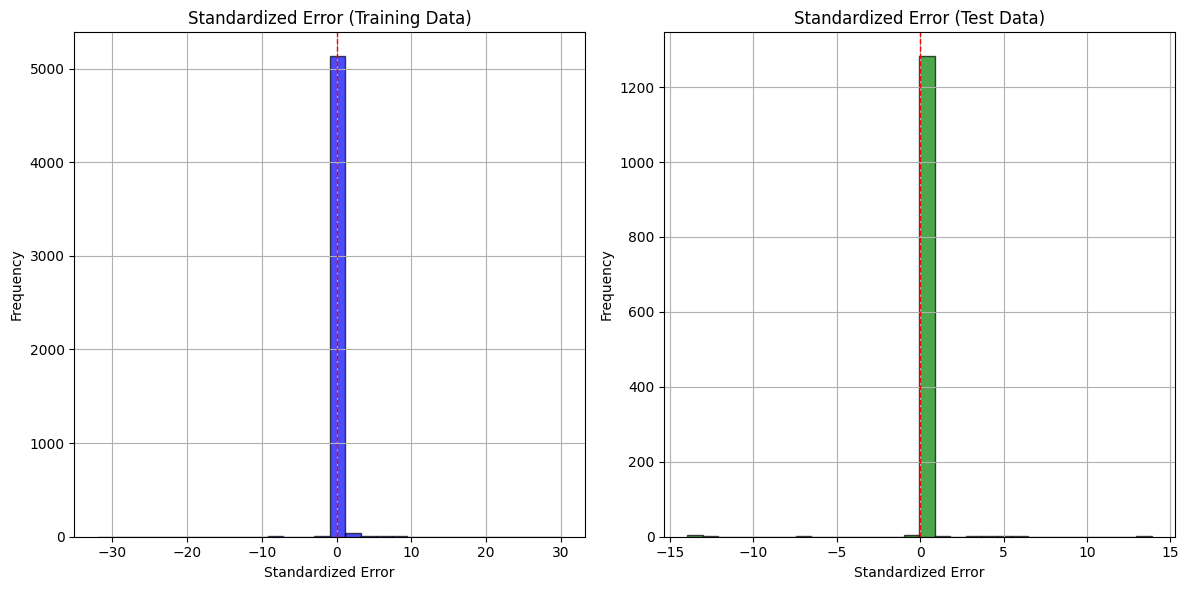

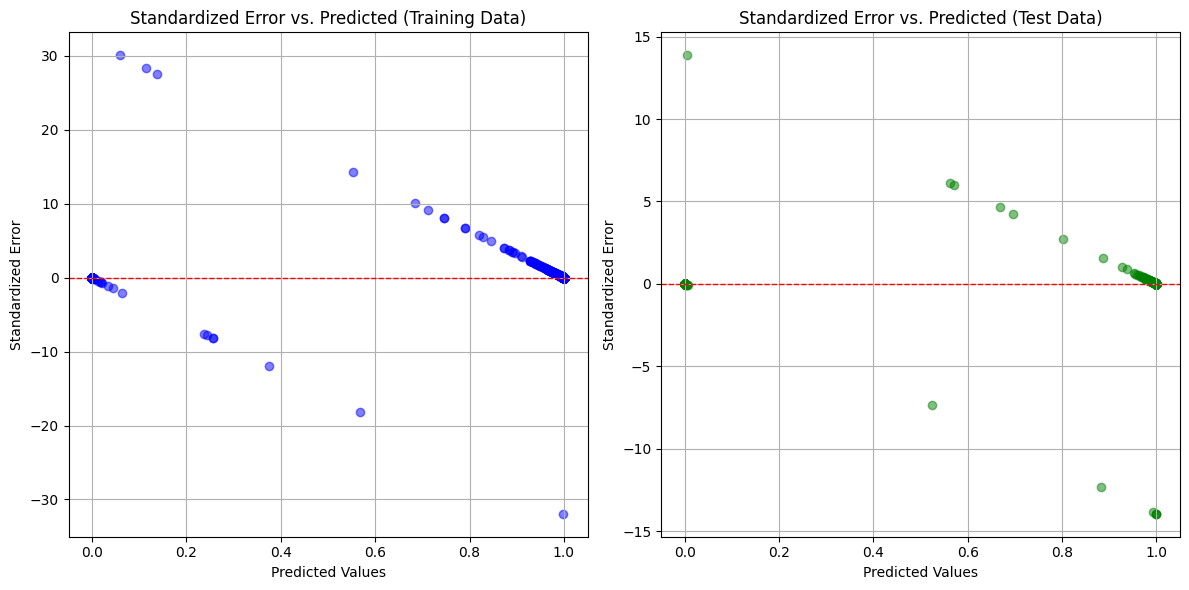

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (errors)
train_residuals = y_train - ytrain_hat
test_residuals = y_test - ytest_hat

# Standardize the residuals
train_std_error = train_residuals / np.std(train_residuals)
test_std_error = test_residuals / np.std(test_residuals)

# Plot histogram of standardized errors
plt.figure(figsize=(12, 6))

# Histogram for training data
plt.subplot(1, 2, 1)
plt.hist(train_std_error, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error (Training Data)')
plt.xlabel('Standardized Error')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for test data
plt.subplot(1, 2, 2)
plt.hist(test_std_error, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error (Test Data)')
plt.xlabel('Standardized Error')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Scatter plot of standardized error vs. predictions (optional)
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(ytrain_hat, train_std_error, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error vs. Predicted (Training Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Error')
plt.grid(True)

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(ytest_hat, test_std_error, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error vs. Predicted (Test Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Error')
plt.grid(True)

plt.tight_layout()
plt.show()


In [123]:
# Save the model to an HDF5 file
model_path = '/content/ANNmodel.h5'
ANNmodel.save(model_path)
print(f"Model saved to {model_path}")


Model saved to /content/ANNmodel.h5


In [124]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/ANNmodel.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [129]:
# Example: New data to predict
#new_data = np.array([[7.5, 0.33, 0.1, 1.2, 0.015, 17, 45, 0.9968, 3.15, 0.5, 10.5]])  # Shape: (1, 11)
new_data = np.array([[7.9, 0.37, 0.23, 1.8, 0.077, 23, 49, 0.9963, 3.28, 0.67, 9.3]])


# Ensure the data is scaled like your training data
new_data_scaled = StandardScaler().fit_transform(new_data)  # Use the same scaler applied to X_train

# Predict using the model
prediction = ANNmodel.predict(new_data_scaled)
print(f"Predicted value: {prediction[0][0]:.4f}")

predicted_class = 1 if prediction[0][0] >= 0.5 else 0
print(f"Predicted class: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted value: 0.9859
Predicted class: 1
